In [1]:
import csv

# Given data
NUM_runtimes = [0.482604355, 0.41294, 0.401776359, 0.376764722, 0.37, 0.333, 0.304, 0.282, 0.263, 0.247, 0.233]
ML_runtimes = [0.42874, 0.35780, 0.30177459, 0.246764722, 0.21, 0.2001, 0.1965, 0.1854, 0.1742, 0.16902, 0.14375]
cores = list(range(1, len(NUM_runtimes) + 1))  # Assuming 1 to 11 cores

# Write data to CSV file
with open('runtimes.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Cores', 'NUM_runtimes', 'ML_runtimes'])
    for core, num_runtime, ml_runtime in zip(cores, NUM_runtimes, ML_runtimes):
        writer.writerow([core, num_runtime, ml_runtime])

print("Data has been saved to runtimes.csv")

Data has been saved to runtimes.csv


In [2]:
NUM_runtimes = [0.16086811833333334, 0.15764666666666667, 0.143925453, 0.12558824066666666, 0.12033333333333334,
                0.115, 0.10009333333333333, 0.08399999999999999, 0.08066666666666667, 0.07933333333333333, 0.07766666666666668]
ML_runtimes = [0.1336082555216373, 0.1122366835982955, 0.10452256027315436, 0.0810117460655268, 0.07904018487111355,
               0.06522691189022098, 0.06300655721626158, 0.061110773568127656, 0.06008481476990967, 0.057058929394587745, 0.049930686911000484]

cores = list(range(1, len(NUM_runtimes) + 1))  # Assuming 1 to 11 cores

# Write data to CSV file
with open('runtimes_48.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Cores', 'NUM_runtimes', 'ML_runtimes'])
    for core, num_runtime, ml_runtime in zip(cores, NUM_runtimes, ML_runtimes):
        writer.writerow([core, num_runtime, ml_runtime])

print("Data has been saved to runtimes.csv")

Data has been saved to runtimes.csv


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S1 = np.linspace(0, 3, 100)
S2 = np.linspace(0, 3, 100)
K = 1.0
T = 0.5
r = 0.05
sigma1 = 0.2
sigma2 = 0.3
rho = 0.5

# Helper function for M(a, b; rho)


def M(a, b, rho):
    x = np.linspace(-10, a, 1000)
    y = np.linspace(-10, b, 1000)
    X, Y = np.meshgrid(x, y)
    Z = np.exp(-((X**2 - 2 * rho * X * Y + Y**2) / (2 * (1 - rho**2)))
               ) / (2 * np.pi * np.sqrt(1 - rho**2))
    return np.trapz(np.trapz(Z, x), y)


# Compute y1, y2, d, rho1, rho2, and sigma
y1 = (np.log(S1 / K) + (0.05 + sigma1**2 / 2) * T) / (sigma1 * np.sqrt(T))
y2 = (np.log(S2 / K) + (0.05 + sigma2**2 / 2) * T) / (sigma2 * np.sqrt(T))
d = (np.log(S1 / S2) + ((0.05 + sigma1**2 / 2) - (0.05 + sigma2**2 / 2) + sigma2**2 / 2)
     * T) / (np.sqrt(sigma1**2 + sigma2**2 - 2 * rho * sigma1 * sigma2) * np.sqrt(T))
rho1 = (sigma1 - rho * sigma2) / np.sqrt(sigma1 **
                                         2 + sigma2**2 - 2 * rho * sigma1 * sigma2)
rho2 = (sigma2 - rho * sigma1) / np.sqrt(sigma1 **
                                         2 + sigma2**2 - 2 * rho * sigma1 * sigma2)
sigma = np.sqrt(0.5 * sigma1**2 + sigma2**2 - 2 * rho * sigma1 * sigma2)

# Compute call option price
c_max = S1 * np.exp(-r * T) * M(y1, d, rho1) + S2 * np.exp(-r * T) * M(y2, -d + sigma * np.sqrt(T),
                                                                       rho2) - K * np.exp(-r * T) * (1 - M(-y1 + sigma1 * np.sqrt(T), -y2 + sigma2 * np.sqrt(T), rho))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(S1, c_max, label='Call Option Price')
plt.xlabel('Asset Value (S1)')
plt.ylabel('Option Price')
plt.title('Analytic Solution of Call Option on Maximum of Two Risky Assets')
plt.legend()
plt.grid(True)
plt.savefig('call_option_max_risky_assets.png')
plt.show()

/var/folders/d3/fcy0mnqs5_53s66265mgk8wr0000gn/T/ipykernel_61750/2755916915.py:27: RuntimeWarning: divide by zero encountered in log
  y1 = (np.log(S1 / K) + (0.05 + sigma1**2 / 2) * T) / (sigma1 * np.sqrt(T))
/var/folders/d3/fcy0mnqs5_53s66265mgk8wr0000gn/T/ipykernel_61750/2755916915.py:28: RuntimeWarning: divide by zero encountered in log
  y2 = (np.log(S2 / K) + (0.05 + sigma2**2 / 2) * T) / (sigma2 * np.sqrt(T))
/var/folders/d3/fcy0mnqs5_53s66265mgk8wr0000gn/T/ipykernel_61750/2755916915.py:29: RuntimeWarning: invalid value encountered in divide
  d = (np.log(S1 / S2) + ((0.05 + sigma1**2 / 2) - (0.05 + sigma2**2 / 2) + sigma2**2 / 2)
/usr/local/Caskroom/mambaforge/base/envs/hobby/lib/python3.10/site-packages/numpy/core/function_base.py:159: RuntimeWarning: invalid value encountered in multiply
  y = y * step


In [1]:
'''ArithmeticError\begin{align*}
c_{\text{max}}(S_1, S_2, K, T) &= S_1 e^{-rT}{M(y_1, d; \rho_1)} + S_2 e^{-rT}{M(y_2, -d + \sigma \sqrt{T}; \rho_2)} \\
&\quad - Ke^{-rT} \left(1 - M(-y_1 + \sigma_1 \sqrt{T}, -y_2 + \sigma_2 \sqrt{T}; \rho)\right)
\end{align*}

where:

\begin{align*}
M(a, b; \rho) &= \frac{1}{2 \pi \sqrt{1 - \rho^2}} \int_{-\infty}^a \int_{-\infty}^b \exp \left\{ - \frac{x^2 - 2\rho xy + y^2}{2(1 - \rho^2)} \right\} \, dx \, dy \\
y_1 &= \frac{\ln(S_1/K) + (b_1 + \sigma_1^2/2)T}{\sigma_1 \sqrt{T}} \\
y_2 &= \frac{\ln(S_2/K) + (b_2 + \sigma_2^2/2)T}{\sigma_2 \sqrt{T}} \\
d &= \frac{\ln(S_1/S_2) + (b_1 - b_2 + \sigma^2 /2)T}{\sigma \sqrt{T}} \\
\rho_1 &= \frac{\sigma_1 - \rho \sigma_2}{\sigma} \\
\rho_2 &= \frac{\sigma_2 - \rho \sigma_1}{\sigma} \\
\sigma &= \sqrt{q\sigma_1^2 + \sigma_2^2 - 2\rho \sigma_1 \sigma_2}
\end{align*}'''

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from scipy import integrate


def M(a, b, rho):
    def integrand(x, y):
        return np.exp(-(x**2 - 2*rho*x*y + y**2) / (2*(1 - rho**2)))
    return (1 / (2 * np.pi * np.sqrt(1 - rho**2))) * integrate.dblquad(integrand, -np.inf, a, lambda x: -np.inf, lambda x: b)[0]


def c_max(S1, S2, K, T, r, b1, b2, sigma1, sigma2, rho, q):
    sigma = np.sqrt(q*sigma1**2 + sigma2**2 - 2*rho*sigma1*sigma2)
    y1 = (np.log(S1/K) + (b1 + sigma1**2/2)*T) / (sigma1 * np.sqrt(T))
    y2 = (np.log(S2/K) + (b2 + sigma2**2/2)*T) / (sigma2 * np.sqrt(T))
    d = (np.log(S1/S2) + (b1 - b2 + sigma**2 / 2)*T) / (sigma * np.sqrt(T))
    rho1 = (sigma1 - rho*sigma2) / sigma
    rho2 = (sigma2 - rho*sigma1) / sigma
    return S1 * np.exp(-r*T) * M(y1, d, rho1) + S2 * np.exp(-r*T) * M(y2, -d + sigma*np.sqrt(T), rho2) - K * np.exp(-r*T) * (1 - M(-y1 + sigma1*np.sqrt(T), -y2 + sigma2*np.sqrt(T), rho))



result = c_max(S1, S2, K, T, r, b1, b2, sigma1, sigma2, rho, q)
print(result)

NameError: name 'S1' is not defined

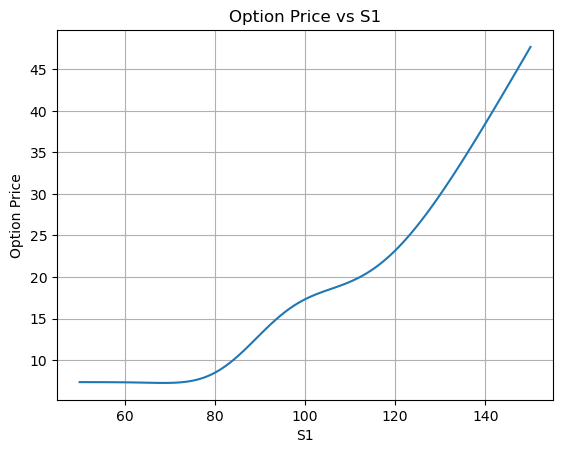

In [3]:
S1_values = np.linspace(50, 150, 100)
prices = [c_max(S1, S2, K, T, r, b1, b2, sigma1, sigma2, rho, q)
          for S1 in S1_values]

plt.plot(S1_values, prices)
plt.xlabel('S1')
plt.ylabel('Option Price')
plt.title('Option Price vs S1')
plt.grid(True)
plt.show()

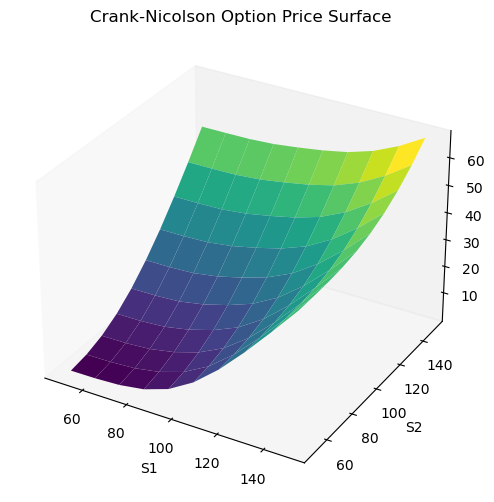

In [2]:
from mpl_toolkits.mplot3d import Axes3D


K = 100
T = 1
r = 0.05
b1 = 0.05
b2 = 0.05
sigma1 = 0.2
sigma2 = 0.4
rho = 0.3
q = 0.5

S1_values = np.linspace(50, 150, 10)
S2_values = np.linspace(50, 150, 10)

S1_values, S2_values = np.meshgrid(S1_values, S2_values)
prices = np.array([c_max(S1, S2, K, T, r, b1, b2, sigma1, sigma2, rho, q)
                  for S1, S2 in zip(np.ravel(S1_values), np.ravel(S2_values))])
prices_cn = prices.reshape(S1_values.shape)

fig = plt.figure()
fig.set_size_inches(8, 6)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S1_values, S2_values, prices_cn, cmap='viridis')

ax.set_xlabel('S1')
ax.set_ylabel('S2')
ax.set_zlabel('Option Price')
plt.title('Crank-Nicolson Option Price Surface')
ax.grid(False)
plt.show()

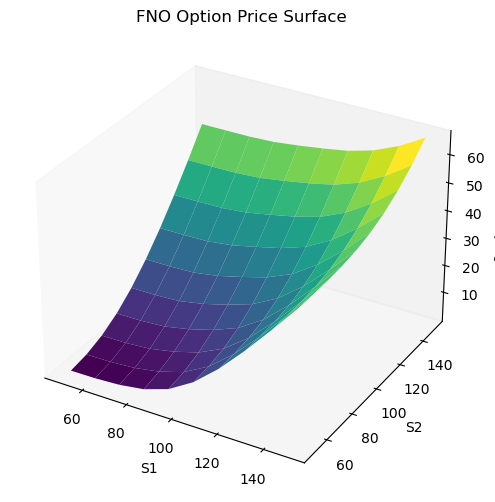

In [3]:
from mpl_toolkits.mplot3d import Axes3D


K = 100
T = 1
r = 0.05
b1 = 0.05
b2 = 0.05
sigma1 = 0.2
sigma2 = 0.4
rho = 0.4
q = 0.5

S1_values = np.linspace(50, 150, 10)
S2_values = np.linspace(50, 150, 10)

S1_values, S2_values = np.meshgrid(S1_values, S2_values)
prices = np.array([c_max(S1, S2, K, T, r, b1, b2, sigma1, sigma2, rho, q)
                  for S1, S2 in zip(np.ravel(S1_values), np.ravel(S2_values))])
prices_fno = prices.reshape(S1_values.shape)

fig = plt.figure()
fig.set_size_inches(8, 6)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S1_values, S2_values, prices_fno, cmap='viridis')

ax.set_xlabel('S1')
ax.set_ylabel('S2')
ax.set_zlabel('Option Price')
plt.title('FNO Option Price Surface')
ax.grid(False)
plt.show()

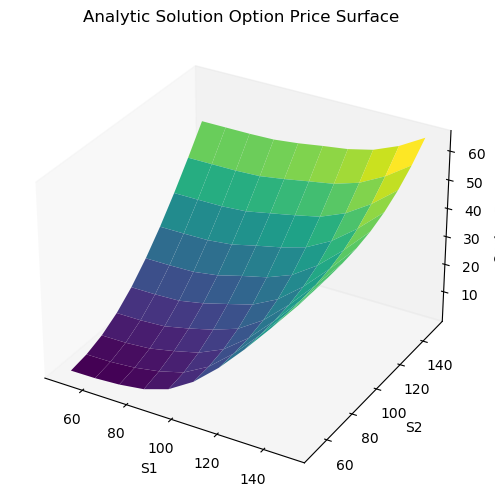

In [4]:
from mpl_toolkits.mplot3d import Axes3D


K = 100
T = 1
r = 0.05
b1 = 0.05
b2 = 0.05
sigma1 = 0.2
sigma2 = 0.4
rho = 0.5
q = 0.5

S1_values = np.linspace(50, 150, 10)
S2_values = np.linspace(50, 150, 10)

S1_values, S2_values = np.meshgrid(S1_values, S2_values)
prices = np.array([c_max(S1, S2, K, T, r, b1, b2, sigma1, sigma2, rho, q)
                  for S1, S2 in zip(np.ravel(S1_values), np.ravel(S2_values))])
prices_an = prices.reshape(S1_values.shape)

fig = plt.figure()
fig.set_size_inches(8, 6)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S1_values, S2_values, prices_an, cmap='viridis')

ax.set_xlabel('S1')
ax.set_ylabel('S2')
ax.set_zlabel('Option Price')
plt.title('Analytic Solution Option Price Surface')
ax.grid(False)
plt.show()

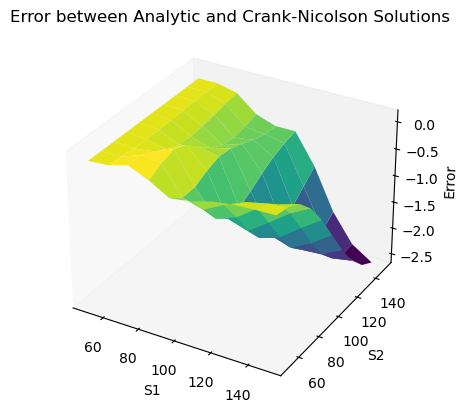

In [5]:
# Assuming prices_cn is the array of prices obtained from the Crank-Nicolson method
# and it has the same shape as the 'prices' array

error = prices_an - prices_cn

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S1_values, S2_values, error, cmap='viridis')

ax.set_xlabel('S1')
ax.set_ylabel('S2')
ax.set_zlabel('Error')
ax.grid(False)
plt.title('Error between Analytic and Crank-Nicolson Solutions')
plt.show()

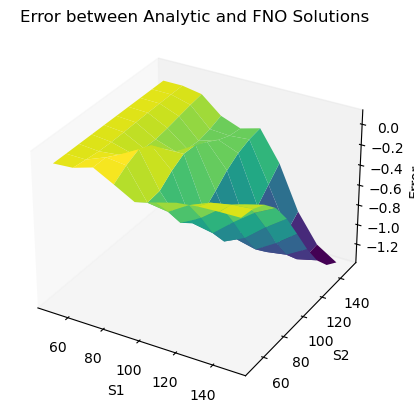

In [6]:
# Assuming prices_cn is the array of prices obtained from the Crank-Nicolson method
# and it has the same shape as the 'prices' array

error = prices_an - prices_fno

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S1_values, S2_values, error, cmap='viridis')

ax.set_xlabel('S1')
ax.set_ylabel('S2')
ax.set_zlabel('Error')
plt.title('Error between Analytic and FNO Solutions')
ax.grid(False)
plt.show()

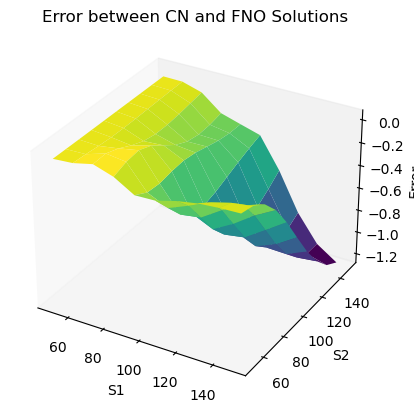

In [8]:
error = prices_fno - prices_cn

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S1_values, S2_values, error, cmap='viridis')

ax.set_xlabel('S1')
ax.set_ylabel('S2')
ax.set_zlabel('Error')
plt.title('Error between CN and FNO Solutions')
ax.grid(False)
plt.show()